In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
unemployment = pd.read_csv('divorce.csv')

# Relationships in Data

## Importing DateTime data

You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

The column names and data types are as follows:

````
divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
````
It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.

pandas has been imported as pd.

### Instructions

+ Import divorce.csv, saving as a DataFrame, divorce; indicate in the import function that the divorce_date, dob_man, dob_woman, and marriage_date columns should be imported as DateTime values.

In [4]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv("divorce.csv", parse_dates=["divorce_date" ,"dob_man","dob_woman","marriage_date",])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


## Updating data type to DateTime
Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

pandas has been imported as pd.

### Instructions 1/2

### Question
+ Which of the columns in the divorce DataFrame has not been updated to a DateTime data type but should be?

### ANSWER:
+ marriage_date

### Instructions 2/2

+ Convert the marriage_date column of the divorce DataFrame to DateTime values.

In [5]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

## Visualizing relationships over time
Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

The divorce DataFrame (with all dates formatted as DateTime data types) has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

### Instructions

+ Define a column called marriage_year, which contains just the year portion of the marriage_date column.
+ Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.


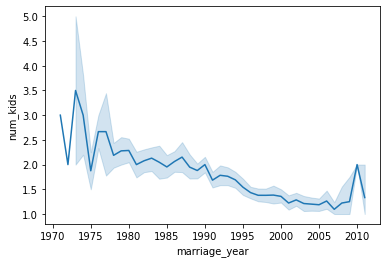

In [7]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

## Interpreting a heatmap
Which of the below statements is correct regarding the relationships between variables in the divorce DataFrame?

The divorce DataFrame has been loaded for you so that you can explore it in the shell. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

### ANSWER
+ A later marriage_year is correlated with having fewer children.

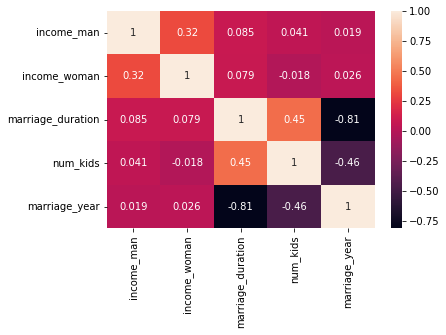

In [8]:
# Check with heatmap:
sns.heatmap(divorce.corr(), annot=True)
plt.show()

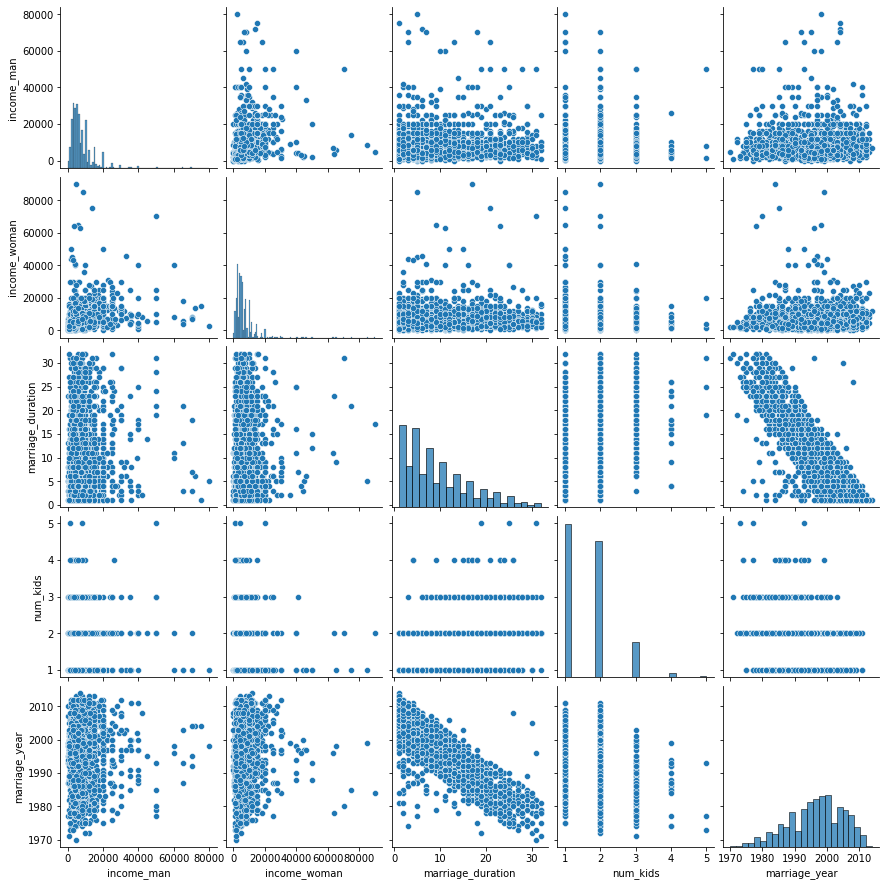

In [9]:
# Check with pairplot:
sns.pairplot(data=divorce)
plt.show()


## Visualizing variable relationships
In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

In this exercise, you'll create a scatter plot to visualize the relationship between these variables. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

### Instructions

+ Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.

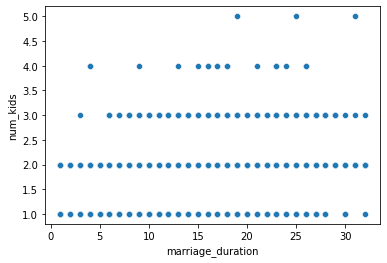

In [10]:
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()

## Visualizing multiple variable relationships
Seaborn's .pairplot() is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

Your task is to use a pairplot to compare the relationship between marriage_duration and income_woman. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

### Instructions

+ Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame.

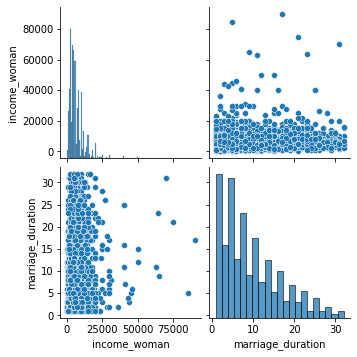

In [11]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(divorce, hue=None, vars=['income_woman','marriage_duration'], x_vars='income_woman', y_vars='marriage_duration')
plt.show()

## Categorial data in scatter plots
In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

The divorce DataFrame has been loaded for you, and woman_age_marriage has already been defined as a column representing an estimate of the woman's age at the time of marriage. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

### Instructions

+ Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.

In [ ]:
# Create the scatter plot
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman', size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None,)
plt.show()

## Exploring with KDE plots
Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

The divorce DataFrame has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns. Recall that the num_kids column in divorce lists only N/A values for couples with no children, so you'll only be looking at distributions for divorced couples with at least one child.

### Instructions 1/3

+ Create a KDE plot that shows marriage_duration on the x-axis and a different colored line for each possible number of children that a couple might have, represented by num_kids.

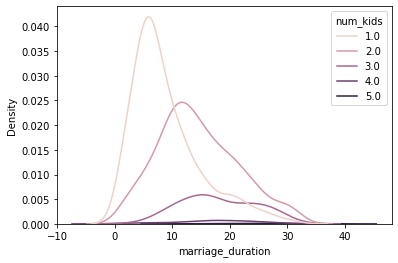

In [14]:
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', y=None, hue='num_kids', weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None)
plt.show()

## Instructions 2/3

+ Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.

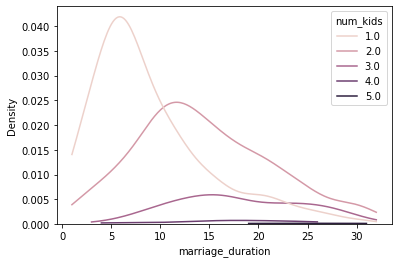

In [15]:
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

### Instructions 3/3

+ Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.

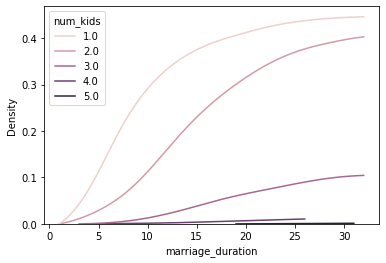

In [16]:
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()